# Importing Required Libraries

We import all the necessary libraries that will be used throughout our machine learning project. Each library has a specific purpose that helps in data handling, visualization, modeling, and evaluation.

- **NumPy**:  
  Used for numerical operations. It handles arrays, mathematical functions, and linear algebra efficiently.

- **Pandas**:  
  Essential for data manipulation and analysis. It helps us read, filter, and structure our dataset using DataFrames.

- **Matplotlib**:  
  Used for creating basic visualizations such as line charts, bar graphs, and histograms.

- **Seaborn**:  
  A statistical data visualization library built on top of Matplotlib. It provides beautiful and informative graphics.

- **Scikit-learn**:  
  The core machine learning library for Python. It provides tools for:
  - Preprocessing (e.g. scaling, train-test split)
  - Building models (e.g. logistic regression, decision trees)
  - Evaluating models (e.g. accuracy, confusion matrix)


- **Pickle**:

  We use the `pickle` library to save the trained ML model into a `.pkl` file.
This allows us to reuse the model without retraining.


- Avoids retraining
- Good for deployment
- Makes model portable




In [126]:
# Numerical and data manipulation 
import numpy as np
import pandas as pd

# Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine learning tools from sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For save the model
import pickle


# Data Loading and Exploration with Classes

We are creating a single class `DataLoader` which:
- Loads the CSV file into a Pandas DataFrame
- Automatically prints the following information upon method calls:
  

  - `head_data()` ➝ Returns the top rows
  - `tail_data()` ➝ Returns the bottom rows
  - `sample_data()` ➝ Returns a random sample of the data
  - `describe_data()` ➝ Shows statistical summary
  - `info_data()` ➝ Shows data types and nulls


In [127]:
pd.set_option("display.width",1000)

class DataLoader:

    def __init__(self, file_path):
        """
        Initializes the DataLoader with file path
        Loads data into self.df
        """
        self.file_path = file_path
        self.df = None 
    def load_data(self):
        try:
            self.df = pd.read_csv(self.file_path)
            return "Data loaded successfully"
        except Exception as e:
            return f"Error loading data : {e} "
        
    def show_head(self):
        print("\nHead of the dataset:")
        return self.df.head()

    def show_tail(self):
        print("\nTail of the dataset:")
        return self.df.tail()
    
    def show_shape(self):
        print("\nRows and columns in the dataset are:")
        return self.df.shape
    def show_sample(self):
        print("\nRandom Sample of the Dataset :")
        return self.df.sample()

    def show_description(self):
        print("\nStatistical summary:")
        return self.df.describe()
        
    def show_info(self):
        print("/nDataset information :")
        return self.df.info()



In [128]:
"""Initialize DataLoader Object with CSV File"""
loader = DataLoader("updated dataset.csv")
loader.load_data()


'Data loaded successfully'

In [129]:
loader.show_head()


Head of the dataset:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0


In [130]:
loader.show_tail()


Tail of the dataset:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,0,80.0,0,0,2,27.32,6.2,90,0
99996,0,2.0,0,0,2,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0
99999,0,57.0,0,0,0,22.43,6.6,90,0


In [131]:
loader.show_sample()


Random Sample of the Dataset :


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11496,0,80.0,0,1,1,27.32,5.0,126,0


In [132]:
loader.show_description()


Statistical summary:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414300,41.885856,0.07485,0.039420,1.556850,27.320767,5.527507,138.058060,0.085000
std,0.492603,22.516840,0.26315,0.194593,0.787105,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,1.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,2.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,3.000000,95.690000,9.000000,300.000000,1.000000


In [133]:
loader.show_info()

/nDataset information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


# Data Cleaning and Preprocessing

We create a new class called `DataCleaner` to handle preprocessing tasks before training a machine learning model.

### Tasks Performed:

1. **Null Value Handling**
   - We check for missing (null) values in the dataset.
   - If any are found, we decide whether to:
     - Drop them
     - Fill them with statistical values (like mean or median)

2. **Column Renaming**
   - Columns with long names are converted to **abbreviations or simpler names** to improve readability and code simplicity.
  
   - 'gender': 'Gender',
   - 'hypertension': 'Hyp',
   - 'heart_disease ': 'HD',
   - 'smoking_history': 'Smok      ',
   - 'blood_glucose_level ': 'BGL',
   - 'bmi': 'BMI',
   - 'HbA1c_level ': 'HbA1c test',
   - 'age': 'Age',
   - 'diabetes': 'Dia'




In [134]:
class DataCleaner:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def check_nulls(self):
        print("\nChecking for null values:")
        return self.df.isnull().sum()

    def rename_columns(self):
        print("\nRemaining columns to simpler names....")
        renamed_columns = {
                'gender': 'Gender',
                'hypertension': 'Hyp',
                'heart_disease': 'HD',
                'smoking_history': 'Smok',
                'blood_glucose_level': 'BGL',
                'bmi': 'BMI',
                'HbA1c_level': 'HbA1c test',
                'age': 'Age',
                'diabetes': 'Dia'
        }
        self.df.rename(columns=renamed_columns, inplace= True)
        print("Renamed columns successfully.")

    def get_clean_data(self):
        return self.df
        

In [135]:
loader = DataLoader("updated dataset.csv")
loader.load_data()
df = loader.df
cleaner = DataCleaner(df)
cleaner.check_nulls()



Checking for null values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [136]:
cleaner.rename_columns()


Remaining columns to simpler names....
Renamed columns successfully.


In [137]:
# Get the cleaned and updated dataframe
cleaned_df = cleaner.get_clean_data()
cleaned_df

,Gender,Age,Hyp,HD,Smok,BMI,HbA1c test,BGL,Dia
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,2,27.32,6.2,90,0
99996,0,2.0,0,0,2,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


# Statistical Analysis of Dataset

We define a class named `DataStatistics` that gives a deeper insight into the dataset. While `describe()` gives a general overview, we often need specific statistics to make informed decisions about:

- Feature distributions
- Skewness or symmetry
- Outliers detection
- Feature scaling requirements

### Tasks Performed:

1. **Mean** - Average of each feature
2. **Median** - Middle value (less sensitive to outliers)
3. **Mode** - Most frequent value in each column
4. **Max** - Maximum value of each feature
5. **Min** - Minimum value of each feature
6. **Standard Deviation (std)** - Spread of values
7. **Variance** - Square of standard deviation
8. **Count** - Number of non-null entries per column

This class helps us understand how each feature behaves statistically, which is crucial for preprocessing and model building.


In [138]:
class DataStatistics:
    def __init__(self, dataframe):
        self.df = dataframe.copy()
    
    def show_mean(self):
        print("\nMean of each column:")
        return self.df.mean()
    def show_median(self):
        print("\nMedian of each column:")
        return self.df.median()
    def show_mode(self):
        print("\nMode of each column:")
        return self.df.mode()
    def show_max(self):
        print("\nMaximum value in each column:")
        return self.df.max()
    def show_min(self):
        print("\nMinimum value in each column:")
        return self.df.min()
    def show_std(self):
        print("\nStandard Deviation of each column:")
        return self.df.std()
    def show_variance(self):
        print("\nVariance of each column:")
        return self.df.var()
    def show_count(self):
        print("\nCount of non-null values in each column:")
        return self.df.count()

In [139]:
# Assuming 'cleaned_df' is the dataframe after cleaning
stats = DataStatistics(cleaned_df)

stats.show_mean()


Mean of each column:


Gender          0.414300
Age            41.885856
Hyp             0.074850
HD              0.039420
Smok            1.556850
BMI            27.320767
HbA1c test      5.527507
BGL           138.058060
Dia             0.085000
dtype: float64

In [140]:
stats.show_median()


Median of each column:


Gender          0.00
Age            43.00
Hyp             0.00
HD              0.00
Smok            2.00
BMI            27.32
HbA1c test      5.80
BGL           140.00
Dia             0.00
dtype: float64

In [141]:
stats.show_mode()


Mode of each column:


,Gender,Age,Hyp,HD,Smok,BMI,HbA1c test,BGL,Dia
0,0,80.0,0,0,2,27.32,6.6,130,0


In [142]:
stats.show_max()


Maximum value in each column:


Gender          1.00
Age            80.00
Hyp             1.00
HD              1.00
Smok            3.00
BMI            95.69
HbA1c test      9.00
BGL           300.00
Dia             1.00
dtype: float64

In [143]:
stats.show_min()


Minimum value in each column:


Gender         0.00
Age            0.08
Hyp            0.00
HD             0.00
Smok           0.00
BMI           10.01
HbA1c test     3.50
BGL           80.00
Dia            0.00
dtype: float64

In [144]:
stats.show_std()


Standard Deviation of each column:


Gender         0.492603
Age           22.516840
Hyp            0.263150
HD             0.194593
Smok           0.787105
BMI            6.636783
HbA1c test     1.070672
BGL           40.708136
Dia            0.278883
dtype: float64

In [145]:
stats.show_variance()


Variance of each column:


Gender           0.242658
Age            507.008078
Hyp              0.069248
HD               0.037866
Smok             0.619534
BMI             44.046894
HbA1c test       1.146339
BGL           1657.152341
Dia              0.077776
dtype: float64

In [146]:
stats.show_count()


Count of non-null values in each column:


Gender        100000
Age           100000
Hyp           100000
HD            100000
Smok          100000
BMI           100000
HbA1c test    100000
BGL           100000
Dia           100000
dtype: int64

# Exploratory Data Analysis: Univariate & Bivariate

We define two separate classes to perform core EDA tasks:

## 1. Univariate Analysis
Focuses on a single feature to understand:
- Its distribution
- Central tendency
- Spread
- Number of unique values
- Value counts for categorical-like features

In [147]:
class UnivariateAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def unique_counts(self, column):
        print(f"\nUnique values in '{column}':")
        return self.df[column].nunique()

    def value_counts(self, column):
        print(f"\nValue counts in '{column}':")
        return self.df[column].value_counts()

    def column_summary(self, column):
        print(f"\nSummary statistics for '{column}':")
        return self.df[column].describe()

    def check_skewness(self, column):
        return f"\nSkewness of '{column}': {self.df[column].skew()}"

    def check_kurtosis(self, column):
        return f"\nKurtosis of '{column}': {self.df[column].kurt()}"


In [148]:
# Univariate
uni = UnivariateAnalysis(cleaned_df)
uni.unique_counts('Age')


Unique values in 'Age':


102

In [149]:
uni.value_counts('BGL')


Value counts in 'BGL':


BGL
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [150]:
uni.column_summary('BMI')


Summary statistics for 'BMI':


count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: BMI, dtype: float64

In [151]:
uni.check_skewness('HD')

"\nSkewness of 'HD': 4.733871943500769"

In [152]:
uni.check_kurtosis('Hyp')

"\nKurtosis of 'Hyp': 8.441441304829652"

## 2. Bivariate Analysis
Focuses on the relationship between two variables:
- Correlation
- Covariance
- Group-wise statistics (mean, count, etc.)
- Crosstab for categorical combinations

These classes help break down the dataset into understandable chunks so that patterns can emerge before we jump into modeling.

In [153]:
class BivariateAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def correlation_matrix(self):
        print("\nCorrelation matrix:")
        print(self.df.corr())

    def covariance_matrix(self):
        print("\nCovariance matrix:")
        print(self.df.cov())

    def group_mean_by_target(self, target_col):
        print(f"\nMean of each feature grouped by '{target_col}':")
        print(self.df.groupby(target_col).mean())

    def group_count_by_target(self, target_col):
        print(f"\nCount of entries grouped by '{target_col}':")
        print(self.df.groupby(target_col).count())

    def crosstab_two_columns(self, col1, col2):
        print(f"\nCrosstab between '{col1}' and '{col2}':")
        print(pd.crosstab(self.df[col1], self.df[col2]))


In [154]:
# Bivariate
bi = BivariateAnalysis(cleaned_df)
bi.correlation_matrix()


Correlation matrix:


              Gender       Age       Hyp        HD      Smok       BMI  HbA1c test       BGL       Dia
Gender      1.000000 -0.030282  0.014423  0.077911  0.058255 -0.023021    0.020058  0.017189  0.037666
Age        -0.030282  1.000000  0.251171  0.233354  0.017542  0.337396    0.101354  0.110672  0.258008
Hyp         0.014423  0.251171  1.000000  0.121262 -0.010236  0.147666    0.080939  0.084429  0.197823
HD          0.077911  0.233354  0.121262  1.000000  0.048308  0.061198    0.067589  0.070066  0.171727
Smok        0.058255  0.017542 -0.010236  0.048308  1.000000 -0.051028    0.002806 -0.001693  0.005229
BMI        -0.023021  0.337396  0.147666  0.061198 -0.051028  1.000000    0.082997  0.091261  0.214357
HbA1c test  0.020058  0.101354  0.080939  0.067589  0.002806  0.082997    1.000000  0.166733  0.400660
BGL         0.017189  0.110672  0.084429  0.070066 -0.001693  0.091261    0.166733  1.000000  0.419558
Dia         0.037666  0.258008  0.197823  0.171727  0.005229  0.214357   

In [155]:
bi.covariance_matrix()


Covariance matrix:
              Gender         Age       Hyp        HD      Smok        BMI  HbA1c test          BGL       Dia
Gender      0.242658   -0.335883  0.001870  0.007468  0.022587  -0.075262    0.010579     0.344689  0.005175
Age        -0.335883  507.008078  1.488269  1.022470  0.310902  50.420219    2.443449   101.444257  1.620178
Hyp         0.001870    1.488269  0.069248  0.006209 -0.002120   0.257894    0.022804     0.904433  0.014518
HD          0.007468    1.022470  0.006209  0.037866  0.007399   0.079035    0.014082     0.555027  0.009319
Smok        0.022587    0.310902 -0.002120  0.007399  0.619534  -0.266560    0.002365    -0.054231  0.001148
BMI        -0.075262   50.420219  0.257894  0.079035 -0.266560  44.046894    0.589763    24.656192  0.396751
HbA1c test  0.010579    2.443449  0.022804  0.014082  0.002365   0.589763    1.146339     7.267066  0.119634
BGL         0.344689  101.444257  0.904433  0.555027 -0.054231  24.656192    7.267066  1657.152341  4.763163

In [156]:
bi.group_mean_by_target('Dia')


Mean of each feature grouped by 'Dia':
       Gender        Age       Hyp        HD      Smok        BMI  HbA1c test         BGL
Dia                                                                                      
0    0.408645  40.115187  0.058984  0.029235  1.555596  26.887163    5.396761  132.852470
1    0.475176  60.946588  0.245647  0.149059  1.570353  31.988382    6.934953  194.094706


In [157]:
bi.group_count_by_target('Dia')


Count of entries grouped by 'Dia':
     Gender    Age    Hyp     HD   Smok    BMI  HbA1c test    BGL
Dia                                                              
0     91500  91500  91500  91500  91500  91500       91500  91500
1      8500   8500   8500   8500   8500   8500        8500   8500


In [158]:
bi.crosstab_two_columns('HD', 'Dia')


Crosstab between 'HD' and 'Dia':
Dia      0     1
HD              
0    88825  7233
1     2675  1267


# Univariate Data Visualization

These plots explore the **distribution and characteristics of individual columns** (features).

### Plots Covered:
1. Histogram - Frequency distribution
2. Boxplot - Detect outliers and spread
3. KDE Plot - Smoothed version of histogram
4. Countplot - For categorical variables (like target column)


In [159]:
class UnivariatePlots:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def plot_histogram(self, column, bins=30, color='skyblue', edgecolor='black', figsize=(8, 4)):
        print(f"\nHistogram for '{column}'")
        plt.figure(figsize=figsize)
        plt.hist(self.df[column], bins=bins, color=color, edgecolor=edgecolor)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def plot_boxplot(self, column, color='salmon', figsize=(6, 4), orient='v'):
        print(f"\nBoxplot for '{column}'")
        plt.figure(figsize=figsize)
        if orient == 'v':
            sns.boxplot(y=self.df[column], color=color)
        else:
            sns.boxplot(x=self.df[column], color=color)
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()

    def plot_kde(self, column, color='purple', shade=True, figsize=(8, 4)):
        print(f"\nKDE Plot for '{column}'")
        plt.figure(figsize=figsize)
        sns.kdeplot(self.df[column], fill=shade, color=color)
        plt.title(f'KDE Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

    def plot_countplot(self, column, palette='Set2', figsize=(6, 4), orient='v'):
        print(f"\nCountplot for '{column}'")
        plt.figure(figsize=figsize)
        if orient == 'v':
            sns.countplot(x=self.df[column], palette=palette)
        else:
            sns.countplot(y=self.df[column], palette=palette)
        plt.title(f'Countplot of {column}')
        plt.tight_layout()
        plt.show()




Histogram for 'BGL'


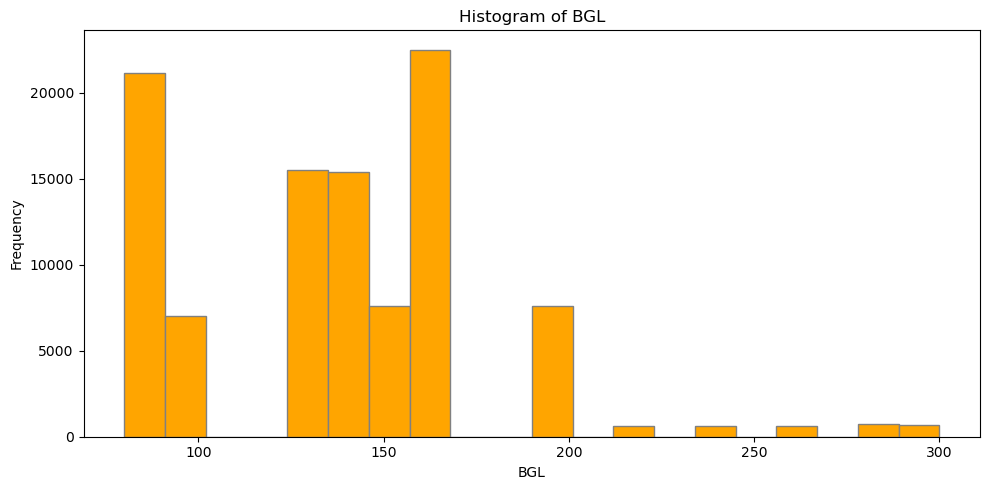

In [160]:
plotter = UnivariatePlots(cleaned_df)

# Histogram with custom color and bins
plotter.plot_histogram("BGL", bins=20, color="orange", edgecolor="gray", figsize=(10, 5))


Boxplot for 'HbA1c test'


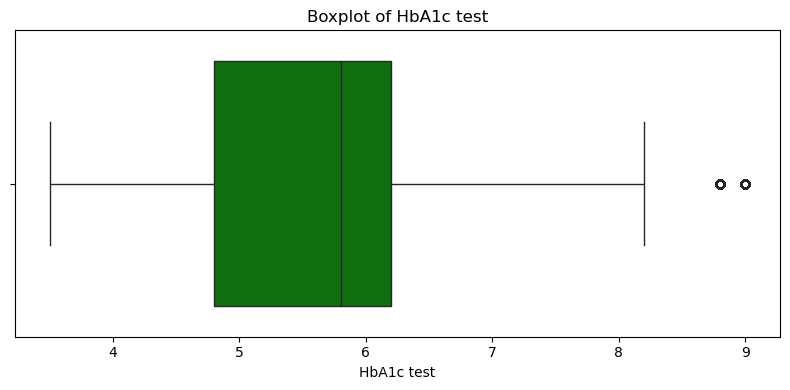

In [161]:
# Boxplot horizontal
plotter.plot_boxplot("HbA1c test", color="green", figsize=(8, 4), orient='h')



KDE Plot for 'Age'


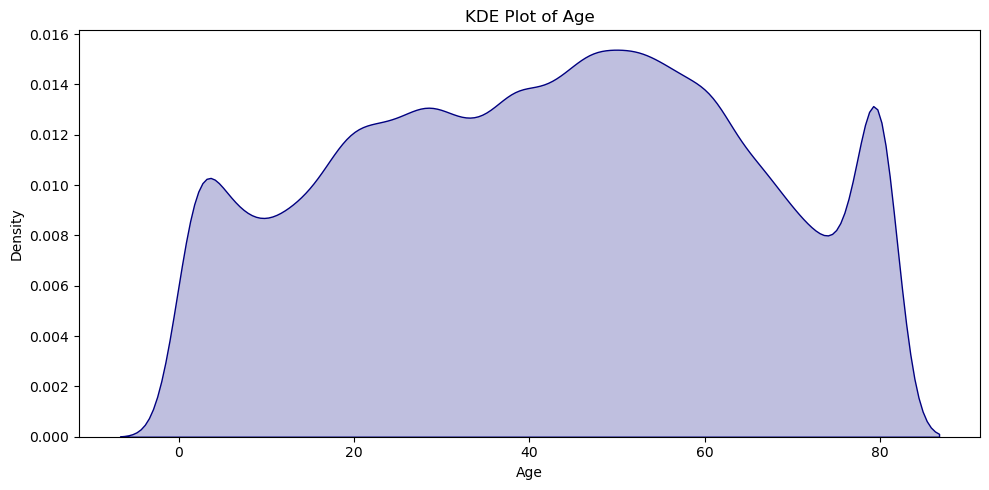

In [162]:
# KDE Plot with custom shade color
plotter.plot_kde("Age", color="navy", shade=True, figsize=(10, 5))

### _**Class Distribution (Diabetes Outcome)**_

**This plot shows the number of diabetic vs non-diabetic patients. A balanced dataset helps ensure that the model does not favor one class over the other.**



Countplot for 'Dia'


C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_19140\2634174423.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.df[column], palette=palette)


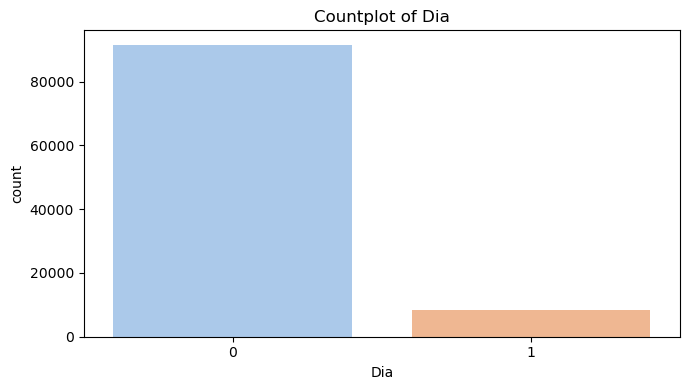

In [163]:
# Countplot for Outcome (categorical)
plotter.plot_countplot("Dia", palette="pastel", figsize=(7, 4))

# Bivariate Data Visualization

These plots explore the **relationship between two features**.

### Plots Covered:
1. Scatter Plot - Numerical vs Numerical
2. Heatmap - Correlation matrix in visual form
3. Boxplot by Category - Spread across classes
4. Pairplot - Multiple pairwise scatterplots


In [164]:
class BivariatePlots:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def scatter_plot(self, col1, col2, hue='Dia', palette='coolwarm', figsize=(8, 5)):
        print(f"\nScatter Plot: '{col1}' vs '{col2}'")
        plt.figure(figsize=figsize)
        sns.scatterplot(x=self.df[col1], y=self.df[col2], hue=self.df[hue], palette=palette)
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.tight_layout()
        plt.show()

    def correlation_heatmap(self, annot=True, cmap='coolwarm', figsize=(10, 8)):
        print("\nCorrelation Heatmap")
        plt.figure(figsize=figsize)
        sns.heatmap(self.df.corr(), annot=annot, cmap=cmap, fmt=".2f", square=True)
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

    def boxplot_by_category(self, numerical_col, category_col='Dia', palette='pastel', figsize=(7, 5)):
        print(f"\nBoxplot: '{numerical_col}' grouped by '{category_col}'")
        plt.figure(figsize=figsize)
        sns.boxplot(x=self.df[category_col], y=self.df[numerical_col], palette=palette)
        plt.title(f'Boxplot of {numerical_col} by {category_col}')
        plt.tight_layout()
        plt.show()

    def pairplot(self, columns=None, hue='Dia', palette='husl'):
        print(f"\nPairplot of selected features")
        if columns:
            sns.pairplot(self.df[columns], hue=hue, palette=palette)
        else:
            sns.pairplot(self.df, hue=hue, palette=palette)
        plt.tight_layout()
        plt.show()



Scatter Plot: 'BMI' vs 'HbA1c test'


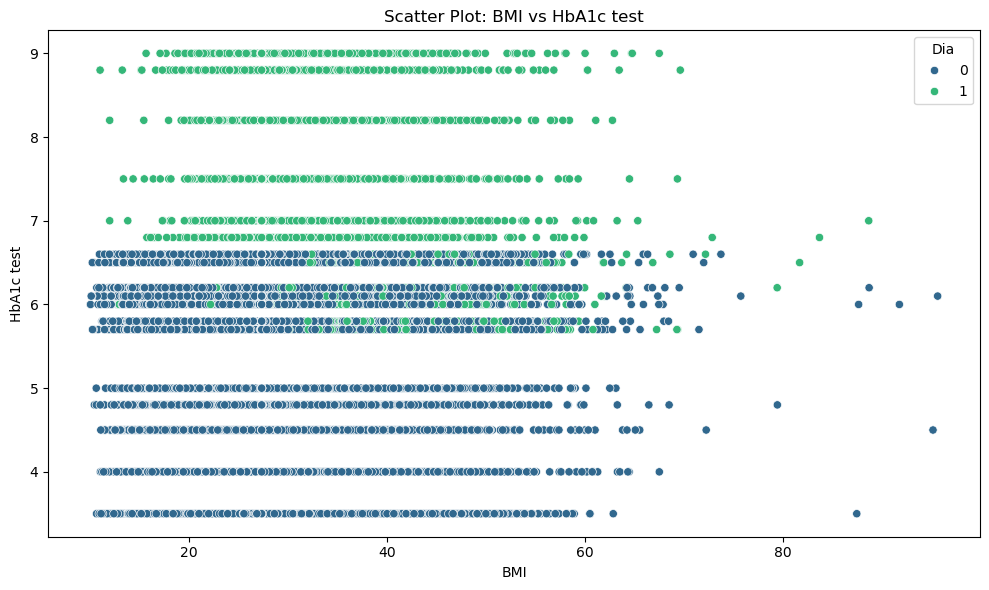

In [165]:
plotter = BivariatePlots(cleaned_df)

# Custom scatter plot
plotter.scatter_plot("BMI", "HbA1c test", palette='viridis', figsize=(10, 6))


Correlation Heatmap


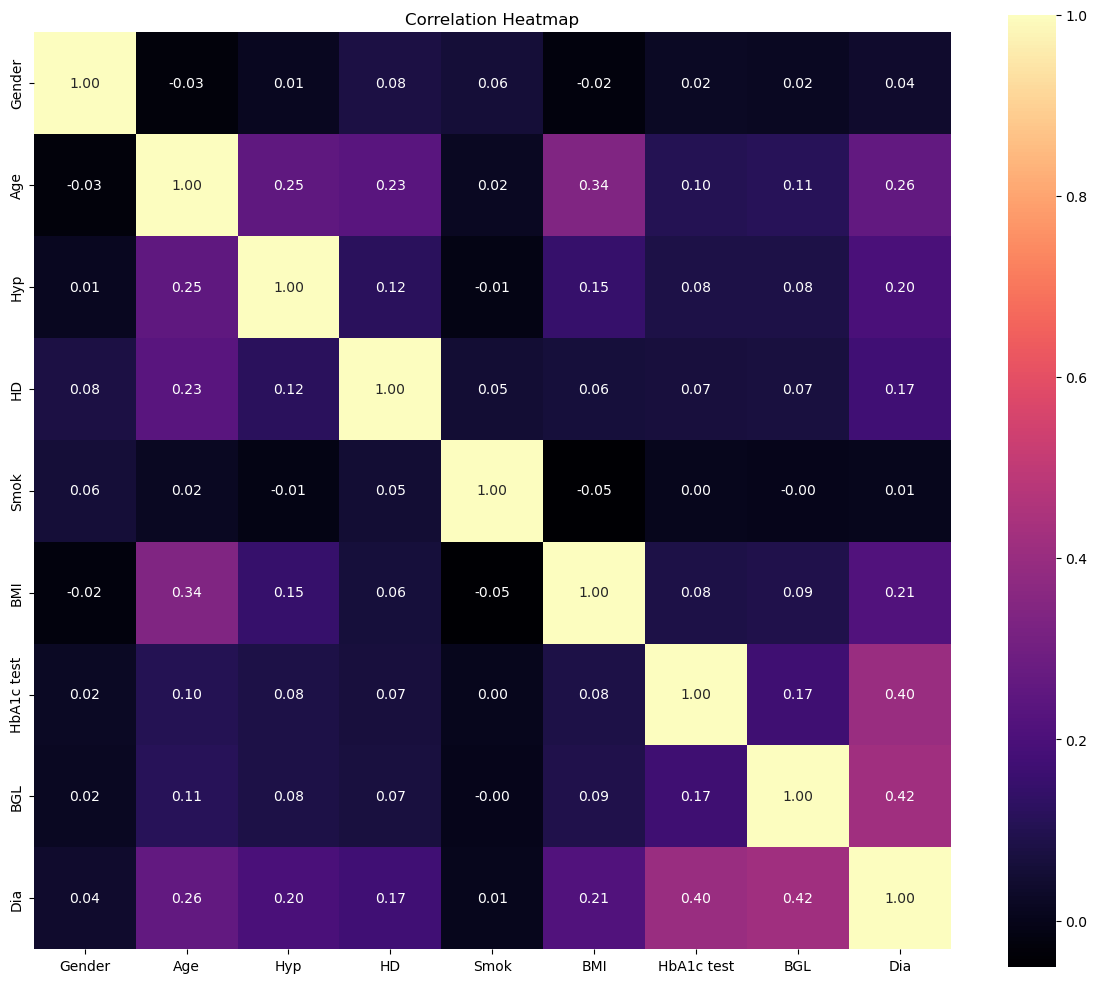

In [166]:
# 🔸 Correlation heatmap with different cmap
plotter.correlation_heatmap(cmap='magma', figsize=(12, 10))

# Machine Learning Workflow

Now we move to training the model. This part includes:

1. **Splitting the Data**  
   - Train-test split using `sklearn.model_selection`

2. **Training the Model**  
   - We use `Logistic Regression` for binary classification (`Outcome` column)

3. **Evaluating the Model**  
   - Accuracy, Confusion Matrix, Classification Report

4. **Predicting with the Model**  
   - Using model to predict new or test data

Every block is wrapped in a separate class to keep things clean and modular.


In [167]:
class DataSplitter:
    def __init__(self, dataframe, target_column):
        self.df = dataframe
        self.target = target_column

    def split_data(self, test_size=0.2, random_state=42):
        X = self.df.drop(self.target, axis=1)
        y = self.df[self.target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

class ModelTrainer:
    def __init__(self):
        self.model = LogisticRegression(max_iter=1000)

    def train_model(self, X_train, y_train):
        self.model.fit(X_train, y_train)
class ModelEvaluator:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test
        self.predictions = self.model.predict(self.X_test)

    def show_prediction(self):
        return self.predictions
    
    def show_accuracy(self):
        print("\nAccuracy Score:")
        return accuracy_score(self.y_test, self.predictions)
    
    def show_confusion_matrix(self):
        print("\nConfusion Matrix:")
        return confusion_matrix(self.y_test, self.predictions)
    
    def show_classification_report(self):
        print("\nClassification Report:")
        return classification_report(self.y_test, self.predictions)


class Predictor:
    def __init__(self, model):
        self.model = model

    def predict(self, new_data):
        prediction = self.model.predict(new_data)
        return prediction


In [168]:
# Splitting the data
splitter = DataSplitter(cleaned_df, target_column='Dia')
X_train, X_test, y_train, y_test = splitter.split_data(test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(       Gender   Age  Hyp  HD  Smok    BMI  HbA1c test  BGL
 75220       1  73.0    0   0     3  24.77         3.5   80
 48955       1  80.0    0   0     1  24.60         5.7  145
 44966       0  38.0    0   0     2  24.33         4.0  158
 13568       0  26.0    0   0     2  18.87         5.0  100
 92727       0  61.0    1   0     0  22.11         4.5   85
 ...       ...   ...  ...  ..   ...    ...         ...  ...
 6265        1  49.0    0   0     1  32.98         5.7   80
 54886       0  15.0    0   0     1  28.10         5.0  159
 76820       1  42.0    0   0     1  26.14         5.8   85
 860         0  37.0    0   0     1  24.96         6.2  158
 15795       0  23.0    0   0     1  27.99         5.0  159
 
 [80000 rows x 8 columns],
        Gender   Age  Hyp  HD  Smok    BMI  HbA1c test  BGL
 75721       0  13.0    0   0     2  20.82         5.8  126
 80184       0   3.0    0   0     2  21.00         5.0  145
 19864       1  63.0    0   0     3  25.32         3.5  200
 76699     

In [169]:
# Step 2: Training the model
trainer = ModelTrainer()
trainer.train_model(X_train, y_train)


In [170]:
# Evaluating the model
evaluator = ModelEvaluator(trainer.model, X_test, y_test)
evaluator


In [171]:
# Show predictions
predictions = evaluator.show_prediction()
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [172]:
# Accuracy score
accuracy = evaluator.show_accuracy()
print(accuracy)



Accuracy Score:
0.9591


In [173]:

evaluator.show_classification_report()


Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98     18292\n           1       0.86      0.62      0.72      1708\n\n    accuracy                           0.96     20000\n   macro avg       0.91      0.80      0.85     20000\nweighted avg       0.96      0.96      0.96     20000\n'

In [174]:
# Confusion matrix
evaluator.show_confusion_matrix()



Confusion Matrix:


array([[18126,   166],
       [  652,  1056]], dtype=int64)

In [175]:
# 4. Predict on new/test data (Optional)

predictor = Predictor(trainer.model)



In [176]:
# ...existing code...
new_data = pd.DataFrame({
    'Gender': [2],
    'Age': [130],
    'Hyp': [130],
    'HD': [80],
    'Smok': [2],
    'BMI': [30.5],
    'HbA1c test': [0.4],
    'BGL': [100],
    'Age': [35]
})

# Prediction (0 = No Diabetes, 1 = Diabetes)
result = predictor.predict(new_data)
print("Predicted Dia:", "Diabetic" if result[0] == 1 else "Not Diabetic")
# ...existing code...

Predicted Dia: Diabetic


# Saving and Loading Trained Model with Pickle

We use the `pickle` library to save the trained ML model into a `.pkl` file.
This allows us to reuse the model without retraining.

### Why Use Pickle?
- Avoids retraining
- Good for deployment
- Makes model portable

The `PickleHandler` class has methods to save and load the model.


In [177]:
class PickleHandler:
    def __init__(self, filepath='diabetes_model.pkl'):
        self.filepath = filepath

    def save_model(self, model):
        with open(self.filepath, 'wb') as file:
            pickle.dump(model, file)
        print(f"✅ Model saved to '{self.filepath}' successfully.")

    def load_model(self):
        with open(self.filepath, 'rb') as file:
            model = pickle.load(file)
        print(f"✅ Model loaded from '{self.filepath}' successfully.")
        return model



In [178]:
# 1. After training the model
pickle_handler = PickleHandler()
pickle_handler.save_model('diabetes_model.pkl')


# # Predict using the loaded model
# predictor = pickle_handler.load_model()

# Predictor(predictor)  

# # Example input for prediction
# new_input = pd.DataFrame({
#     'Preg': [4],
#     'Glu': [140],
#     'BP': [70],
#     'Skin': [20],
#     'Ins': [80],
#     'BMI': [33.0],
#     'DPF': [0.6],
#     'Age': [45]
# })

# result = predictor.predict(new_input)
# print("Prediction from Pickled Model:", "Diabetic" if result[0] == 1 else "Not Diabetic")


✅ Model saved to 'diabetes_model.pkl' successfully.
